# TensorFlow
- TensorFlow is Googles flagship library for Machine Learning.

## Background
TensorFlow from Google is an open source library that primarily focuses on deep learning. It uses **computational dataflow graphs** to represent models and other calculations.

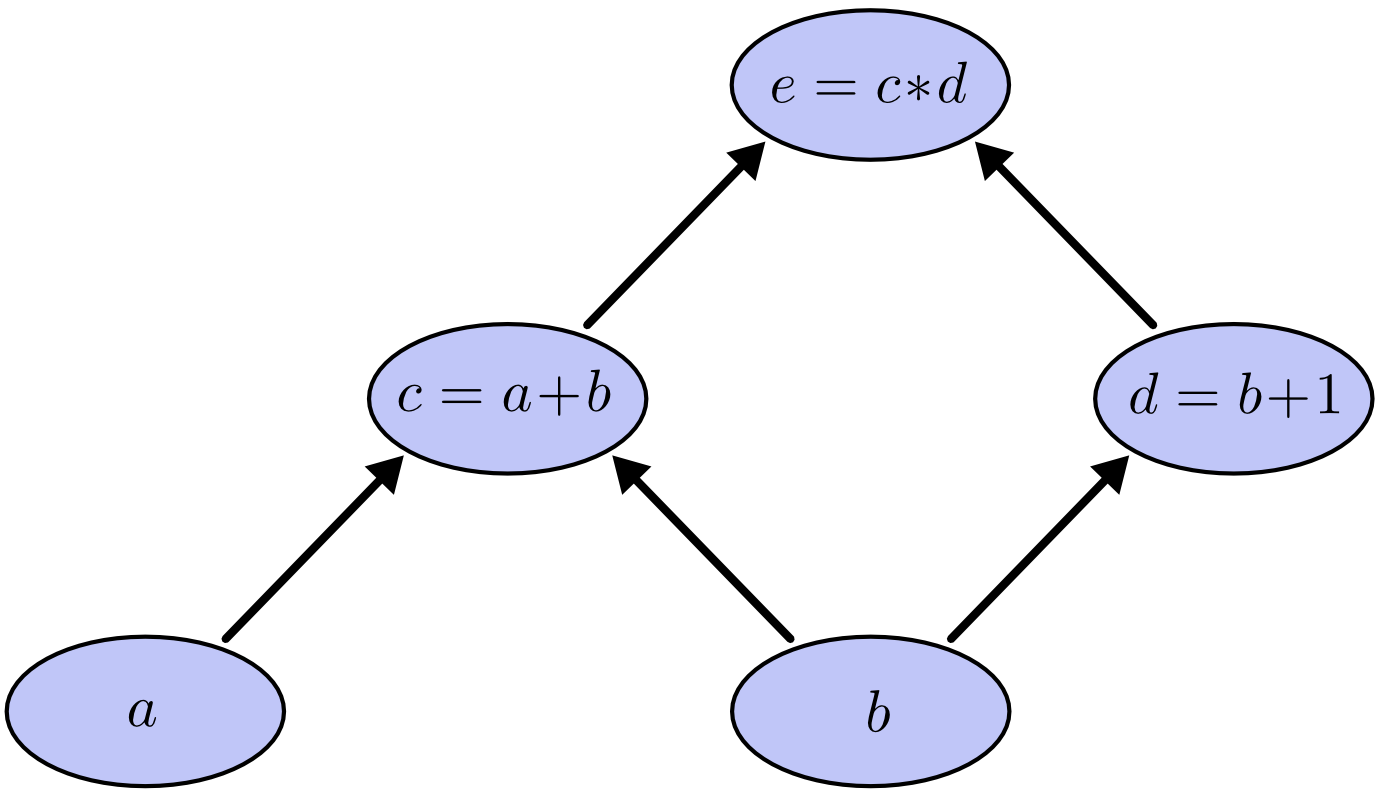

The nodes in the graph are called **ops (operations)**, whereas the edges denote the multidimensional data tensors transferred between them.

TensorFlow is capable of **automatic differentiation**; it stores gradients at each node in the graph, so that no extra computation is used during backpropagation.

The library contains many helper functions to create models and execute them on a distributed architecture. The definition of neural networks is generally easier with the **Keras** package.

### Tensors

Tensors are collections of real numbers $\mathbb{R}$ with a given dimensionality:

| dimensions | common name | example|
|------------|-------------|--------|
| 0 | scalar | single float | 
| 1 | vector | time series | 
| 2 | matrix | black/white image | 
| 3 | 3-tensor | RGB image | 
| 4 | 4-tensor | RGB video | 
| 5 | 5-tensor | set of videos | 

Illustrates how you can perform distributed computing!

## What happens if we write a line of python like this?

In [1]:
3 + 4

7

1. Python parses the Python Code(parse tree)
2. Python translates the parse tree into elementary operations (byte code)
3. Python calls some C++ functions that execute the byte code

**Python does this for every single operation!**

4. The C++ functions (Python interpreter) exist as machine code that the processor executes directly

**Slow, not compiled, but flexible!!**

## What TensorFlow does

1. Creates a Computation Graph
2. Copy the Computation Graph to a device (with TF C library installed). Difference is we can save this graph and take it around. e.g. can save the computation graph to a JSON file
3. Each node is linked to code that knows how to execute that node (device-dependent)

### Defining a Computation Graph
- The easiest operation to use is to define a constant tensor:

In [2]:
import tensorflow as tf

In [3]:
a = tf.constant(1.0)
b = tf.constant(2.0, tf.float32)
c = a + b

In [4]:
c

<tf.Tensor 'add:0' shape=() dtype=float32>

- **Tensor is like a numpy array but with any number of dimensions! Can be 0, 1 or ...**

In [5]:
type(c)

tensorflow.python.framework.ops.Tensor

- So far we have defined a constant 1.0 and constant 2.0. **These are nodes in the graph**, and this graph is called the **computation graph!**

**The Computation Graph is the main thing you need to grasp with TensorFlow.**

- **We added a 3rd node, the addition!** This makes our computation graph. It isn't doing anything yet as we haven't asked it to.

**We can ask it to evaluate the addition by creating an interactive session in Jupyter!**

- The sessions can be specific for parts of the computer, here it is run in the local CPU. 


- Instead, we could say we want it to run it on a GPU (graphics processing unit - devised to make 3D games, can create vectors - became useful for other things e.g. training neural nets, it has a lot of computational power!)


- Could also run it on a remote CPU, or a web browser (if you use TF-JS)

### Sessions
- To execute a computation graph, you need to create a **session** and **evaluate** - using `eval()` one or more nodes. The easiest way to do this is an interactive session (good in Jupyter etc.):

In [6]:
# Here you would specify the local CPU, GPU, remote CPU...
sess = tf.InteractiveSession()

print(c.eval())

3.0


- Alternatively, can use `run()`

In [7]:
sess.run(c)

3.0

- Once we have the computation graph, we can make it run on any of a local CPU, a GPU, a remote CPU, a browser!

**TensorFlow decouples from python! It can be exported from our TF program, and sent to an external GPU and run on that**

- In a program, you would rather create an explicit session:

In [8]:
with tf.Session() as sess:
    print(sess.run(c))

3.0


#### Remember, Tensor is like a numpy array but with any number of dimensions! Can be 0, 1, 2 ...

In [9]:
a = tf.constant([1,2,3], dtype=tf.float32)
a

<tf.Tensor 'Const_2:0' shape=(3,) dtype=float32>

In [10]:
b = tf.constant(4, dtype=tf.float32)
b

<tf.Tensor 'Const_3:0' shape=() dtype=float32>

In [11]:
d = tf.random_normal(shape=(3,), dtype=tf.float32)
d

<tf.Tensor 'random_normal:0' shape=(3,) dtype=float32>

In [12]:
sess = tf.InteractiveSession()

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [13]:
sess.run(d)

array([-0.16957584, -1.005134  , -0.54188496], dtype=float32)

In [14]:
c = a + b
e = c * d

In [15]:
c

<tf.Tensor 'add_1:0' shape=(3,) dtype=float32>

In [16]:
sess.run(c)

array([5., 6., 7.], dtype=float32)

In [17]:
e

<tf.Tensor 'mul:0' shape=(3,) dtype=float32>

In [18]:
sess.run(e)

array([-4.669523  ,  0.04101748, -1.6123587 ], dtype=float32)

- The Python ContextManager `with` closes the session automatically.

### Variables
- **Variables** can change their value inside the graph.

In [19]:
x = tf.Variable([1.0, 2.0])
y = tf.Variable(tf.random_uniform((2,)))

add = tf.add(x, y)
increase_x = tf.assign(x, x + y)

Instructions for updating:
Colocations handled automatically by placer.


- All variables need to be initialized with a constant value or another node:

In [20]:
sess.run(x.initializer)
sess.run(y.initializer)

print(x.eval())

[1. 2.]


In [23]:
sess.run(add)
print(x.eval())

[1. 2.]


In [24]:
sess.run(increase_x)
print(x.eval())

[1.2644954 2.3533587]


- Alternatively, you can initalize all variables with one op:

In [25]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run() # actually initialize all the variables
    result = e.eval()

In [26]:
result

array([-7.0341425,  6.595051 ,  7.215937 ], dtype=float32)

### Placeholders
- Placeholders allow you to send data into a computation graph.

In [27]:
sess = tf.InteractiveSession()

In [28]:
p = tf.placeholder(name='p', shape=(2,), dtype=tf.float32)
q = p * 3

result = sess.run(q, feed_dict={'p:0':[4.0, 5.0]})
print(result)

[12. 15.]


### More example TensorFlow ops:
Many basic operations in TensorFlow work like their NumPy pendants:

- `tf.range()`
- `tf.zeros()`
- `tf.reshape()`
- `tf.argmax()`
- `tf.matmul()`
- `tf.random_normal()`
- `tf.nn.softmax()`
- `tf.executing_eagerly()`
- `tf.VERSION`

### Other Frameworks
- **Torch** – A scientific computing framework. The initial release of Torch was in 2002. Reputed organizations such as Facebook AI Research and IBM use Torch. The PyTorch is the hottest contender for TensorFlows position.


- **Theano** - a deep-learning package in Python primarily used for computationally intensive research-oriented activities. It is tightly integrated with Numpy array and has efficient symbolic differentiators. Mostly considered obsolete.


- **Caffee** – Deep-learning framework developed by Berkeley AI Research (BAIR).Used for experiments and industry deployment. Caffe implementation can use GPU very efficiently.


- **CuDNN** – CuDNN stands for CUDA Deep Neural Network library. It provides a library of primitives for GPU implementation of deep neural networks.


- **deepleanring4j** – Open source distributed deep-learning framework for Java.

### Exercises

1. Implement the computation from the graph above.

2. Download the California Housing Dataset:

        from sklearn.datasets import fetch_california_housing

        housing = fetch_california_housing()
        X, y = housing.data, housing.target

Use TensorFlow to min-max-scale the data.

3. Calculate the MSE for the housing data and store it in a **Variable** using the `tf.assign` operation.

4. Implement Linear Regression with TensorFlow. Use the built-in op `tf.train.GradientDescentOptimizer`.

### More Exercises in the documentation!